In [1]:
#Data Visualization for Inflation data in year 2019 from World Bank


from pandas_datareader import wb
import pandas as pd
import geopandas


In [2]:
#To use the API, we need the indicator, which you will find in the url.
data= wb.download(indicator="FP.CPI.TOTL.ZG", country="all", start=2019, end=2019)

In [3]:
print(data)

                                     FP.CPI.TOTL.ZG
country                        year                
Africa Eastern and Southern    2019        3.923372
Africa Western and Central     2019        1.758565
Arab World                     2019        1.091848
Caribbean small states         2019        1.431356
Central Europe and the Baltics 2019        2.664561
...                                             ...
Virgin Islands (U.S.)          2019             NaN
West Bank and Gaza             2019        1.580183
Yemen, Rep.                    2019             NaN
Zambia                         2019        9.150316
Zimbabwe                       2019             NaN

[266 rows x 1 columns]


In [4]:
data=data.reset_index(1)

In [5]:
print(data)

                                year  FP.CPI.TOTL.ZG
country                                             
Africa Eastern and Southern     2019        3.923372
Africa Western and Central      2019        1.758565
Arab World                      2019        1.091848
Caribbean small states          2019        1.431356
Central Europe and the Baltics  2019        2.664561
...                              ...             ...
Virgin Islands (U.S.)           2019             NaN
West Bank and Gaza              2019        1.580183
Yemen, Rep.                     2019             NaN
Zambia                          2019        9.150316
Zimbabwe                        2019             NaN

[266 rows x 2 columns]


In [6]:
data.columns=["year","inflation"]

In [7]:
print(data)

                                year  inflation
country                                        
Africa Eastern and Southern     2019   3.923372
Africa Western and Central      2019   1.758565
Arab World                      2019   1.091848
Caribbean small states          2019   1.431356
Central Europe and the Baltics  2019   2.664561
...                              ...        ...
Virgin Islands (U.S.)           2019        NaN
West Bank and Gaza              2019   1.580183
Yemen, Rep.                     2019        NaN
Zambia                          2019   9.150316
Zimbabwe                        2019        NaN

[266 rows x 2 columns]


In [8]:
#The world map data is available from GeoPandas.

map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
map = map[map['name'] != 'Antarctica']
print(map)

       pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  
0    M

In [9]:
#We would use a location service, which maps counties to country codes. 
#Hence, mapping each data sets country names to country codes (note that GeoPandas already has 3 letter country codes, but some are missing, like Norway and more). 
#This approach still can have some missing pieces, as some country names are not known by the mapping.

from pandas_datareader import wb
import geopandas

pd.set_option('display.width', 3000)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 500)

map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
map = map[map['name'] != 'Antarctica']
map = map.set_index('name')

data = wb.download(indicator='FP.CPI.TOTL.ZG', country='all', start=2019, end=2019)
data = data.reset_index(1)
data.columns = ['year', 'inflation']

map = map.join(data, how='outer')
print(map)

                                                         pop_est                continent iso_a3   gdp_md_est                                           geometry  year  inflation
Afghanistan                                         3.412481e+07                     Asia    AFG     64080.00  POLYGON ((66.51861 37.36278, 67.07578 37.35614...  2019   2.302373
Africa Eastern and Southern                                  NaN                      NaN    NaN          NaN                                               None  2019   3.923372
Africa Western and Central                                   NaN                      NaN    NaN          NaN                                               None  2019   1.758565
Albania                                             3.047987e+06                   Europe    ALB     33900.00  POLYGON ((21.02004 40.84273, 20.99999 40.58000...  2019   1.411091
Algeria                                             4.096944e+07                   Africa    DZA    609400.00 

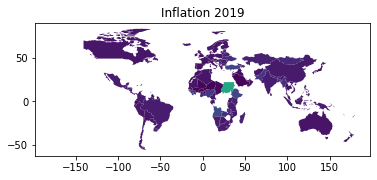

In [11]:
import matplotlib.pyplot as plt
map.plot('inflation')
plt.title("Inflation 2019")
plt.show()

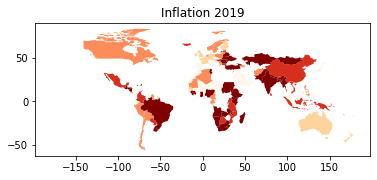

In [12]:
map.plot('inflation', cmap='OrRd', scheme='quantiles')
plt.title("Inflation 2019")
plt.show()

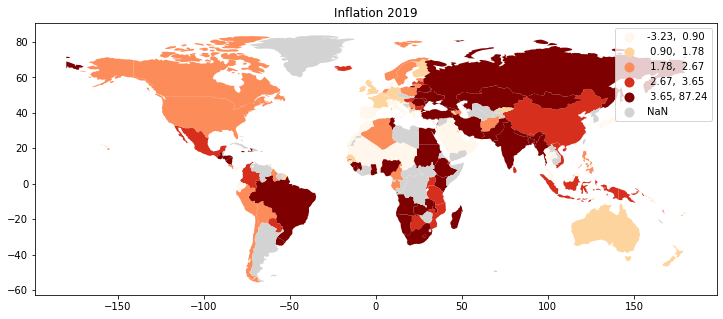

In [13]:
#Adding grey tone to countries not mapped, adding a legend, setting the size.from pandas_datareader import wb

import geopandas
import pandas as pd
import matplotlib.pyplot as plt

map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
map = map[map['name'] != 'Antarctica']
map = map.set_index('name')
index_change = {
    'United States of America': 'United States',
    'Yemen': 'Yemen, Rep.',
    'Venezuela': 'Venezuela, RB',
    'Syria': 'Syrian Arab Republic',
    'Solomon Is.': 'Solomon Islands',
    'Russia': 'Russian Federation',
    'Iran': 'Iran, Islamic Rep.',
    'Gambia': 'Gambia, The',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Mauritania': 'Mauritius',
    'Egypt': 'Egypt, Arab Rep.'
}
map = map.rename(index=index_change)

data = wb.download(indicator='FP.CPI.TOTL.ZG', country='all', start=2019, end=2019)
data = data.reset_index(1)
data.columns = ['year', 'inflation']

map = map.join(data, how='outer')

map.plot('inflation', cmap='OrRd', scheme='quantiles', missing_kwds={"color": "lightgrey"}, legend=True, figsize=(14,5))
plt.title("Inflation 2019")
plt.show()